In [1]:
import numpy as np

In [2]:
array_1 = [1,2,3,4,5]
array_2 = [6,7,8,9,0]
array_3 = np.hstack((array_1, array_2))
print('将数组2添加到数据1中后得到:{}'.format(array_3))

将数组2添加到数据1中后得到:[1 2 3 4 5 6 7 8 9 0]


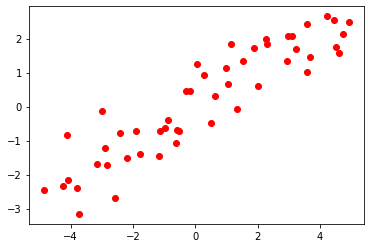

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random.RandomState(38)
x = rnd.uniform(-5,5,size=50)
y_no_noise = (np.cos(6*x)+x)
X = x.reshape(-1,1)
y = (y_no_noise+rnd.normal(size=len(x)))/2
plt.plot(X,y,'o',c='r')
plt.show()

D:\ProgramData\Anaconda3.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


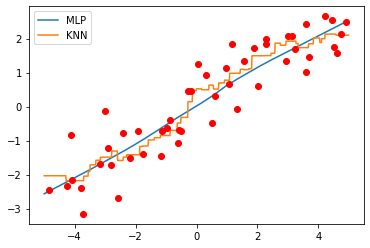

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
line = np.linspace(-5,5,1000,endpoint=False).reshape(-1,1)
mlpr = MLPRegressor().fit(X,y)
knr = KNeighborsRegressor().fit(X,y)
#绘制图形

plt.plot(line,mlpr.predict(line),label='MLP')
plt.plot(line,knr.predict(line),label='KNN')
plt.plot(X,y,'o',c='r')
plt.legend(loc='best')
plt.show()

In [31]:
X.shape

(50, 1)

In [32]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X)

array([[-1.1522688 ],
       [ 3.59707847],
       [ 4.44199636],
       [ 2.02824894],
       [ 1.33634097],
       [ 1.05961282],
       [-2.99873157],
       [-1.12612112],
       [-2.41016836],
       [-4.25392719],
       [-2.19043025],
       [-0.61565849],
       [-0.16750956],
       [ 3.68489486],
       [ 0.29629384],
       [ 0.62263144],
       [-0.28944656],
       [ 1.88842007],
       [ 0.04828605],
       [ 3.23175755],
       [ 4.60367154],
       [ 3.58144239],
       [-1.90823576],
       [ 0.49721062],
       [ 1.54678382],
       [ 4.50858728],
       [ 4.74769648],
       [-0.51465342],
       [ 2.99272929],
       [ 2.28353637],
       [-4.11854445],
       [ 2.93034609],
       [ 4.23164296],
       [ 1.14906239],
       [-2.89214074],
       [-2.58358812],
       [-0.86820987],
       [ 2.29189373],
       [-4.84909649],
       [-3.15721303],
       [-0.5696664 ],
       [ 0.9839937 ],
       [-3.72807017],
       [ 3.11845046],
       [-2.82121278],
       [-4

In [12]:
#设置箱体数为11
bins = np.linspace(-5,5,11)
#装箱操作
target_bin = np.digitize(X,bins=bins)
#打印装箱数据范围
print('装箱数据范围：\n{}'.format(bins))
#打印前十个数据的特征值
print('\n前十个数据点的特征值：\n{}'.format(X[:10]))
#找到他们所在的箱子
print('\n前十个数据点所在的箱子：\n{}'.format(target_bin[:10]))

装箱数据范围：
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]

前十个数据点的特征值：
[[-1.1522688 ]
 [ 3.59707847]
 [ 4.44199636]
 [ 2.02824894]
 [ 1.33634097]
 [ 1.05961282]
 [-2.99873157]
 [-1.12612112]
 [-2.41016836]
 [-4.25392719]]

前十个数据点所在的箱子：
[[ 4]
 [ 9]
 [10]
 [ 8]
 [ 7]
 [ 7]
 [ 3]
 [ 4]
 [ 3]
 [ 1]]


In [21]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse = False)
onehot.fit(target_bin)
#使用独热编码转化数据
X_in_bin = onehot.transform(target_bin)
#打印结果
print('装箱后的数据形态：{}'.format(X_in_bin.shape))
print('\n装箱后的前十个数据点：\n{}'.format(X_in_bin[:10]))

装箱后的数据形态：(50, 10)

装箱后的前十个数据点：
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
X_stack = np.hstack([X, X_in_bin])
X_stack.shape

(50, 11)

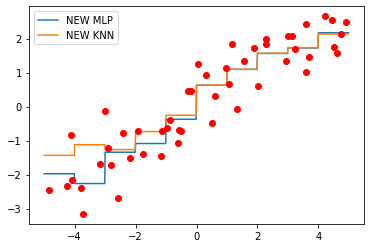

In [18]:
#使用独热编码进行数据表达
new_line = onehot.transform(np.digitize(line,bins=bins))
#使用新的数据来训练模型
new_mlpr = MLPRegressor().fit(X_in_bin,y)
new_knr = KNeighborsRegressor().fit(X_in_bin,y)
#绘制图形
plt.plot(line,new_mlpr.predict(new_line),label='NEW MLP')
plt.plot(line,new_knr.predict(new_line),label='NEW KNN')
plt.plot(X,y,'o',c='r')
plt.legend(loc='best')
plt.show()

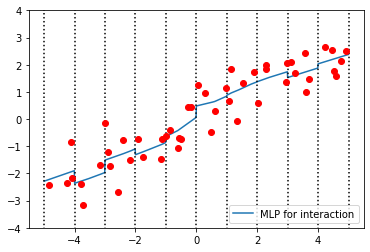

In [20]:
line_stack = np.hstack([line, new_line])
mlpr_interact = MLPRegressor().fit(X_stack, y)
plt.plot(line, mlpr_interact.predict(line_stack), 
         label='MLP for interaction')
plt.ylim(-4,4)
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='k')
plt.legend(loc='lower right')
plt.plot(X, y,'o',c='r')
plt.show()

In [36]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X



poly = PolynomialFeatures(2)
poly.fit_transform(X)



poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [34]:
poly.fit_transform(X).shape

(3, 4)

In [28]:
(X*X_in_bin).shape

(50, 10)

In [29]:
X_multi.shape

(50, 20)

In [22]:
#使用心得堆叠方式处理数据
X_multi = np.hstack([X_in_bin, X*X_in_bin])
print(X_multi.shape)
print(X_multi[0])

(50, 20)
[ 0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        -0.        -0.
 -0.        -1.1522688 -0.        -0.        -0.        -0.
 -0.        -0.       ]


In [5]:
X=array_3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=20, include_bias = False)
X_poly = poly.fit_transform(X)
print (X_poly.shape)

## 开始补充实验

In [40]:
import powerlaw
import numpy as np

In [45]:
np.random.randint(10)#, size=(4, 2))

3

In [46]:
np.arange(6).reshape(3, 2)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [47]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [48]:
import powerlaw
data = np.arange(6) # data 可以是列表或numpy数组
results = powerlaw.Fit(data)
print(results.power_law.alpha )
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
D:\ProgramData\Anaconda3.5\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.9852072080985277
2.0


In [49]:
print('wuhan')

wuhan


In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('腾讯人口迁移数据.xls')#,encoding='utf_8_sig')
df.head()

,year,O_CODE,o_city,D_CODE,d_city,Sum_BUS,Sum_TRAIN,Sum_AIR,sum
0,2015,110000,北京市,120000,天津市,6103394,10471065,0,10471065
1,2015,110000,北京市,130100,石家庄市,465489,1189923,0,1189923
2,2015,110000,北京市,130400,邯郸市,768327,1254207,0,1254207
3,2015,110000,北京市,130500,邢台市,92918,131842,0,131842
4,2015,110000,北京市,130600,保定市,12922717,17642456,0,17642456


In [3]:
df.shape

(65535, 9)

In [4]:
df[df['year']==2017]

,year,O_CODE,o_city,D_CODE,d_city,Sum_BUS,Sum_TRAIN,Sum_AIR,sum
43086,2017,110000,北京市,120000,天津市,6721427,15846626,0,15846626
43087,2017,110000,北京市,130100,石家庄市,3499688,12800778,0,12800778
43088,2017,110000,北京市,130200,唐山市,2505912,5857266,0,5857266
43089,2017,110000,北京市,130300,秦皇岛市,1644206,6050601,0,6050601
43090,2017,110000,北京市,130400,邯郸市,3778807,8562678,4801,8567479
...,...,...,...,...,...,...,...,...,...
65530,2017,542400,那曲地区,630100,西宁市,10871,74331,10664,84995
65531,2017,542400,那曲地区,630200,海东市,1605,10386,2317,12703
65532,2017,542400,那曲地区,632300,黄南藏族自治州,0,280,0,280
65533,2017,542400,那曲地区,632500,海南藏族自治州,637,2944,19,2963


In [65]:
lst1=df[df['year']==2017]['o_city'].values.tolist()
lst2 = sorted(set(lst1), key=lst1.index)
# lst2

In [5]:
import networkx as nx
from node2vec import Node2Vec
import pandas as pd
import numpy as np
# df= pd.read_csv(‘Data/network_table.csv’, index_col=0)
# graph=nx.from_numpy_matrix(df)

In [6]:
G = nx.DiGraph()
# o_city	D_CODE	d_city
for index, row in df[df['year']==2017].iterrows():
    G.add_edges_from([(row['o_city'], row['d_city'])], weight=row['sum'])

In [127]:
for (node, val) in txG.degree():
    if val>500:
        print(node,val)

海口市 599
佛山市 577
广州市 631
东莞市 586
深圳市 616
成都市 626
资阳市 508
重庆市 615
西安市 619
贵阳市 528
哈尔滨市 566
苏州市 605
上海市 632
玉林市 551
惠州市 595
昆明市 569
北京市 623
海东市 559
汉中市 523
武汉市 597
长春市 582
广安市 542
大理白族自治州 521
阳江市 508
阜阳市 593
江门市 568
南阳市 596
郑州市 584
西宁市 548
六安市 533
开封市 545
德阳市 554
泉州市 612
常州市 564
天津市 593
中山市 596
珠海市 514
吉林市 523
太原市 531
泰州市 538
福州市 606
金华市 605
杭州市 612
绵阳市 578
南通市 580
南平市 558
厦门市 579
合肥市 550
长沙市 603
宁波市 620
信阳市 567
安庆市 510
嘉兴市 576
周口市 572
绍兴市 521
扬州市 570
石家庄市 604
温州市 594
湖州市 522
镇江市 525
南京市 593
乐山市 560
安阳市 550
达州市 558
河源市 504
十堰市 545
银川市 537
吴忠市 512
德州市 554
玉溪市 510
百色市 502
台州市 579
青岛市 576
宁德市 536
连云港市 557
安顺市 518
济南市 563
九江市 514
新乡市 518
三明市 587
常德市 507
淮安市 501
烟台市 550
桂林市 567
六盘水市 516
宜宾市 533
天水市 530
商丘市 518
唐山市 525
宝鸡市 529
宜昌市 534
永州市 554
南昌市 587
兰州市 561
大连市 569
临沂市 508
丽水市 565
莆田市 569
安康市 551
潍坊市 515
东营市 524
运城市 564
广元市 510
秦皇岛市 512
临夏回族自治州 512
衡水市 521
营口市 515
泰安市 509
枣庄市 537


In [125]:
txG = nx.DiGraph()
# o_city	D_CODE	d_city
for index, row in pd.read_csv('tx城市.csv').iterrows():
    txG.add_edges_from([(row['Target'], row['Source'])], weight=row['Weight'])

<AxesSubplot:>

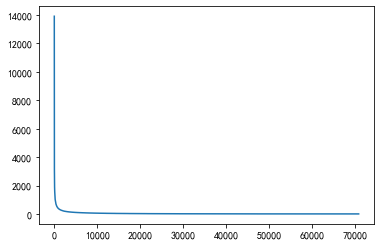

In [180]:
pd.read_csv('tx城市.csv')['Weight'].plot()

<AxesSubplot:>

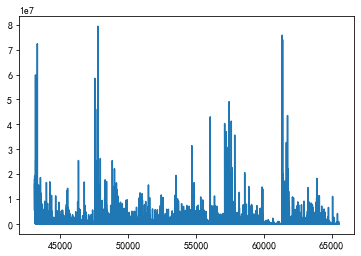

In [169]:
df[df['year']==2017]['sum'].plot()

In [167]:
txG
plt.show()

In [7]:
# G=nx.Graph(g_list)
A=nx.adjacency_matrix(G)
# print(A.todense())

In [72]:
from xpinyin import Pinyin 

#简单使用一下
from xpinyin import Pinyin
p = Pinyin() 
result = p.get_pinyin('小琳爱分享','')

In [74]:
news=[]
for i in  lst2:
    news.append(p.get_pinyin(i,''))

In [75]:
from chord import Chord
Chord(A.todense().tolist(), news).to_html()

## 开始显示

In [8]:
node2vec = Node2Vec(G, dimensions=20, walk_length=10, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

HBox(children=(HTML(value='Computing transition probabilities'), FloatProgress(value=0.0, max=367.0), HTML(value='')))

## 存入文档

In [56]:
dc_data={}
for i in list(set(df[df['year']==2017]['o_city'].values.tolist())):
    dc_data[i]=model.wv.get_vector(i)
pd.DataFrame(dc_data).to_csv('NewCity.csv',index=None,encoding='utf_8_sig')

## 计算与质心的距离

In [78]:
mean_vector=np.zeros(20)
for i in list(set(df[df['year']==2017]['o_city'].values.tolist())):
    mean_vector=mean_vector+model.wv.get_vector(i)
mean_vector/len(list(set(df[df['year']==2017]['o_city'].values.tolist())))

array([ 0.02774763,  0.57523325,  0.31856565,  0.11270553, -0.17838602,
        0.13667482, -0.48272168,  0.00592253, -0.29598195,  0.23230482,
        0.13929701, -0.05978404,  0.11149879, -0.0740437 ,  0.16244468,
       -0.24932194, -0.30778515,  0.00476544,  0.40413044, -0.25277897])

In [80]:
mean_data={}
for i in list(set(df[df['year']==2017]['o_city'].values.tolist())):
    mean_data[i]=np.corrcoef(model.wv.get_vector(i),mean_vector/len(list(set(df[df['year']==2017]['o_city'].values.tolist()))))[0][1]

In [81]:
d_order=sorted(mean_data.items(),key=lambda x:x[1],reverse=False)  # 按字典集合中，每一个元组的第二
d_order

[('那曲地区', 0.42084954242926353),
 ('阿拉善盟', 0.4469766093691739),
 ('乌海市', 0.4859191638546522),
 ('兴安盟', 0.4934221380101367),
 ('白城市', 0.4946889950763928),
 ('晋城市', 0.504092494404424),
 ('大同市', 0.506097609707485),
 ('鄂尔多斯市', 0.5080601949069393),
 ('三门峡市', 0.5099892595032929),
 ('通辽市', 0.5101913417904488),
 ('辽源市', 0.5123595589117005),
 ('济源市', 0.5129404333468951),
 ('巴彦淖尔市', 0.5131261711309398),
 ('乌兰察布市', 0.5136568583936706),
 ('佳木斯市', 0.5169891630131814),
 ('通化市', 0.517236226036761),
 ('阳泉市', 0.5199352325675576),
 ('忻州市', 0.5219856181349811),
 ('宁德市', 0.5221245029383108),
 ('吕梁市', 0.5236153344625785),
 ('长治市', 0.5261729731490475),
 ('包头市', 0.5265199601205649),
 ('运城市', 0.5280249206848494),
 ('朝阳市', 0.5281099809424405),
 ('临汾市', 0.528121671911996),
 ('白山市', 0.528795072738469),
 ('淮北市', 0.5288572872082755),
 ('拉萨市', 0.5291665068474266),
 ('朔州市', 0.5309496600771885),
 ('松原市', 0.5323006540755866),
 ('百色市', 0.5327585773838026),
 ('呼伦贝尔市', 0.5334213627182467),
 ('防城港市', 0.5338168919284975),
 

## 计算tx地图的

In [83]:
mean_vector=np.zeros(20)
words = txmodel.wv.vocab
tx_mean_vector=np.zeros(20)

for word in words:
    tx_mean_vector=tx_mean_vector+txmodel.wv.get_vector(word)
print(tx_mean_vector/len(words))

[-0.17400368 -0.16700205  0.29671871 -0.19301214  0.0438642  -0.00678667
  0.12446251 -0.37840811 -0.10991388 -0.06489954  0.02210416  0.20704322
  0.22133147 -0.36990394  0.18025386 -0.43970002  0.1646205  -0.02140519
 -0.04901777  0.03347564]


In [106]:
L = len(tx_mean_data)					#取字典中键值对的个数
S = sum(tx_mean_data.values())				#取字典中键对应值的总和
S / L

0.6313018927125116

In [107]:
L = len(mean_data)					#取字典中键值对的个数
S = sum(mean_data.values())				#取字典中键对应值的总和
S / L

0.586352460282993

In [85]:
tx_mean_data={}
for word in words:
    tx_mean_data[word]=np.corrcoef(txmodel.wv.get_vector(word),tx_mean_vector/len(words))[0][1]
tx_order=sorted(tx_mean_data.items(),key=lambda x:x[1],reverse=False)  # 按字典集合中，每一个元组的第二
tx_order

[('海口市', 0.39220516573281883),
 ('武威市', 0.42022789218042766),
 ('湘西土家族苗族自治州', 0.427071868381335),
 ('金昌市', 0.43120441161447226),
 ('乐东黎族自治县', 0.43856054337129513),
 ('文昌市', 0.43976806187583994),
 ('梧州市', 0.4426062770902839),
 ('柳州市', 0.4482848523565076),
 ('日喀则市', 0.4552218982248678),
 ('黔南布依族苗族自治州', 0.45701758372418955),
 ('济源市', 0.4573747417702097),
 ('贺州市', 0.4574202022100018),
 ('博尔塔拉蒙古自治州', 0.45811505789845036),
 ('克孜勒苏柯尔克孜自治州', 0.45952736045354764),
 ('黔西南布依族苗族自治州', 0.46140000442874796),
 ('仙桃市', 0.4632208445144289),
 ('拉萨市', 0.4689921689491064),
 ('酒泉市', 0.46928981699387146),
 ('西双版纳傣族自治州', 0.4743455876145903),
 ('淮南市', 0.47455915194586246),
 ('克拉玛依市', 0.47653878377598674),
 ('红河哈尼族彝族自治州', 0.47727632621878296),
 ('神农架林区', 0.47978234631493655),
 ('巴音郭楞蒙古自治州', 0.4823667980342656),
 ('普洱市', 0.4829723295363494),
 ('焦作市', 0.4855098118526151),
 ('嘉峪关市', 0.4869197011570823),
 ('乌海市', 0.487181656888189),
 ('铜陵市', 0.4881613103553283),
 ('湘潭市', 0.48878739282652356),
 ('吕梁市', 0.49075867278

In [130]:
G.degree('武汉市')
txG.degree('武汉市')

597

In [242]:
txdegree={'city':[],'degree':[]}
for (node, val) in txG.degree():
    txdegree['city'].append(node)
    txdegree['degree'].append(val)

In [235]:
a=list(set(txdegree['city']))

In [236]:
txdegree={'city':[],'degree':[]}
for (node, val) in G.degree():
    txdegree['city'].append(node)
    txdegree['degree'].append(val)

In [237]:
b=list(set(txdegree['city']))

In [238]:
cities=list(set(a+b))

In [217]:
# dataframe=pd.DataFrame(txdegree)
# dataframe[dataframe['city']=='武汉市']['degree'].values[0]

In [239]:
def get_degree(city,dataframe):
    try:
        a=dataframe[dataframe['city']==city]['degree'].values[0]
    except:
        a=None
    return a

In [232]:
def get_degree(city,dataframe):
    print(city)
    a=dataframe[dataframe['city']==city]['degree'].values[0]
    
    return a

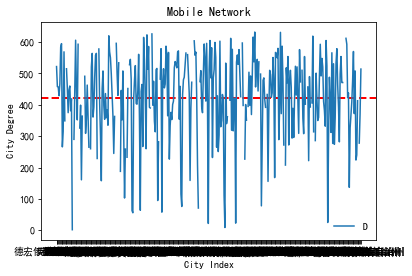

In [243]:
# x = pd.DataFrame(txdegree).index
# y =  pd.DataFrame(txdegree)['degree']
ys=[]
for city in cities:
     ys.append(get_degree(city,pd.DataFrame(txdegree)))
        
plt.title("Mobile Network") 
plt.xlabel("City Index") 
plt.ylabel("City Degree") 
plt.axhline(y=pd.DataFrame(txdegree)['degree'].mean(), c="r", ls="--", lw=2)
a=plt.plot(cities,ys) 
plt.legend(a, 'Degree', loc = 'best',frameon=False)
plt.savefig('4.svg',format='svg')
plt.show()

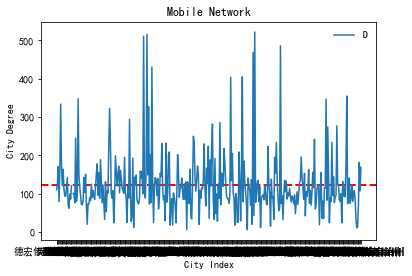

In [241]:
# x = pd.DataFrame(txdegree).index
# y =  pd.DataFrame(txdegree)['degree']
ys=[]
for city in cities:
     ys.append(get_degree(city,pd.DataFrame(txdegree)))
        
plt.title("Mobile Network") 
plt.xlabel("City Index") 
plt.ylabel("City Degree") 
plt.axhline(y=pd.DataFrame(txdegree)['degree'].mean(), c="r", ls="--", lw=2)
a=plt.plot(cities,ys) 
plt.legend(a, 'Degree', loc = 'best',frameon=False)
plt.savefig('3.svg',format='svg')
plt.show()

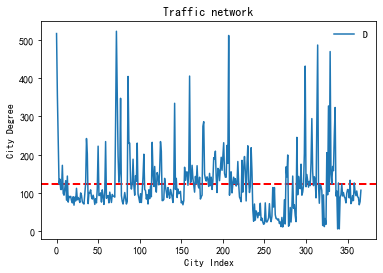

In [203]:
x = pd.DataFrame(txdegree).index
y =  pd.DataFrame(txdegree)['degree']
plt.title("Traffic network") 
plt.xlabel("City Index") 
plt.ylabel("City Degree") 
plt.axhline(y=pd.DataFrame(txdegree)['degree'].mean(), c="r", ls="--", lw=2)
a=plt.plot(x,y) 
plt.legend(a, 'Degree', loc = 'best',frameon=False)
plt.savefig('1.svg',format='svg')
plt.show()

<AxesSubplot:>

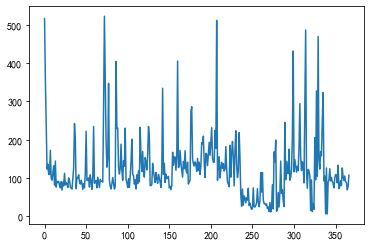

In [189]:
txdegree={'city':[],'degree':[]}
for (node, val) in G.degree():
    txdegree['city'].append(node)
    txdegree['degree'].append(val)
pd.DataFrame(txdegree)['degree'].plot()

In [140]:
 def normalize_list(list):
    max_value = max(list)
    min_value = min(list)
    for i in range(0, len(list)):
        list[i] = (list[i] - min_value) / (max_value - min_value)
    return list

In [139]:
txdegree['nor']=normalize_list(txdegree['degree'])

In [141]:
degree={'city':[],'degree':[]}
for (node, val) in G.degree():
    degree['city'].append(node)
    degree['degree'].append(val)
   
degree['nor']=normalize_list(degree['degree'])

In [143]:
 pd.DataFrame(txdegree).head()

,city,degree,nor
0,三亚市,0.474603,0.474603
1,海口市,0.947619,0.947619
2,来宾市,0.620635,0.620635
3,柳州市,0.790476,0.790476
4,武威市,0.526984,0.526984


In [148]:
nt[nt['city']=='漯河市']['nor'].values[0]

0.5603174603174603

In [160]:
nt['nor'].mean()

0.6674626865671637

In [245]:
rf=pd.read_csv('getcarbon0702.csv')
rf.head()

,城市,FID,CO2,NetSurplus,PerNetSurplus,Per Capita GRP,PerNet
0,北京市,0,60.086432,3.022753e+08,139535.196968,140211.0,-675.803032
1,天津市,1,150.048424,1.845706e+08,117403.486619,120711.0,-3307.513381
2,石家庄市,2,94.951804,5.873951e+07,53587.205520,55723.0,-2135.794480
3,唐山市,3,102.060435,6.741732e+07,85038.113311,87855.0,-2816.886689
4,秦皇岛市,4,31.530109,1.590362e+07,50868.249254,52380.0,-1511.750746


In [264]:
xf[xf['城市']=='上海市']
xf.head()

,城市,FID,CO2,NetSurplus,PerNetSurplus,Per Capita GRP,PerNet
270,定西市,327,13.049087,3.937405e+06,13888.881704,12656.0,1232.881704
271,陇南市,328,8.965097,5.243664e+06,19465.553116,14426.0,5039.553116
246,昭通市,288,5.902798,1.025012e+07,18164.993556,15987.0,2177.993556
267,平凉市,324,10.389118,4.193830e+06,18259.951804,17225.0,1034.951804
236,巴中市,270,4.600224,6.973229e+06,20840.761305,19458.0,1382.761305


In [267]:
xf[xf['城市']=='上海市']

,城市,FID,CO2,NetSurplus,PerNetSurplus,Per Capita GRP,PerNet
67,上海市,73,192.503677,3.222096e+08,131836.595452,134982.0,-3145.404548


In [290]:
aaa=rf.sort_values(by=['CO2'],ascending=False)
# aaa=aaa.reindex
#删除空值再reindex
# aaa.reindex(["城市", "FID","CO2"    ,"NetSurplus"  ,"PerNetSurplus"  ,"Per Capita GRP","PerNet"])#, fill_value = 100)
bbb=aaa.reset_index(drop=True)
# aaa

In [291]:
bbb[(bbb['CO2']>100)].index.tolist()

[0, 1, 2, 3, 4, 5]

## 以上准备计算碳中和代码

D:\ProgramData\Anaconda3.5\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\ProgramData\Anaconda3.5\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3.5\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


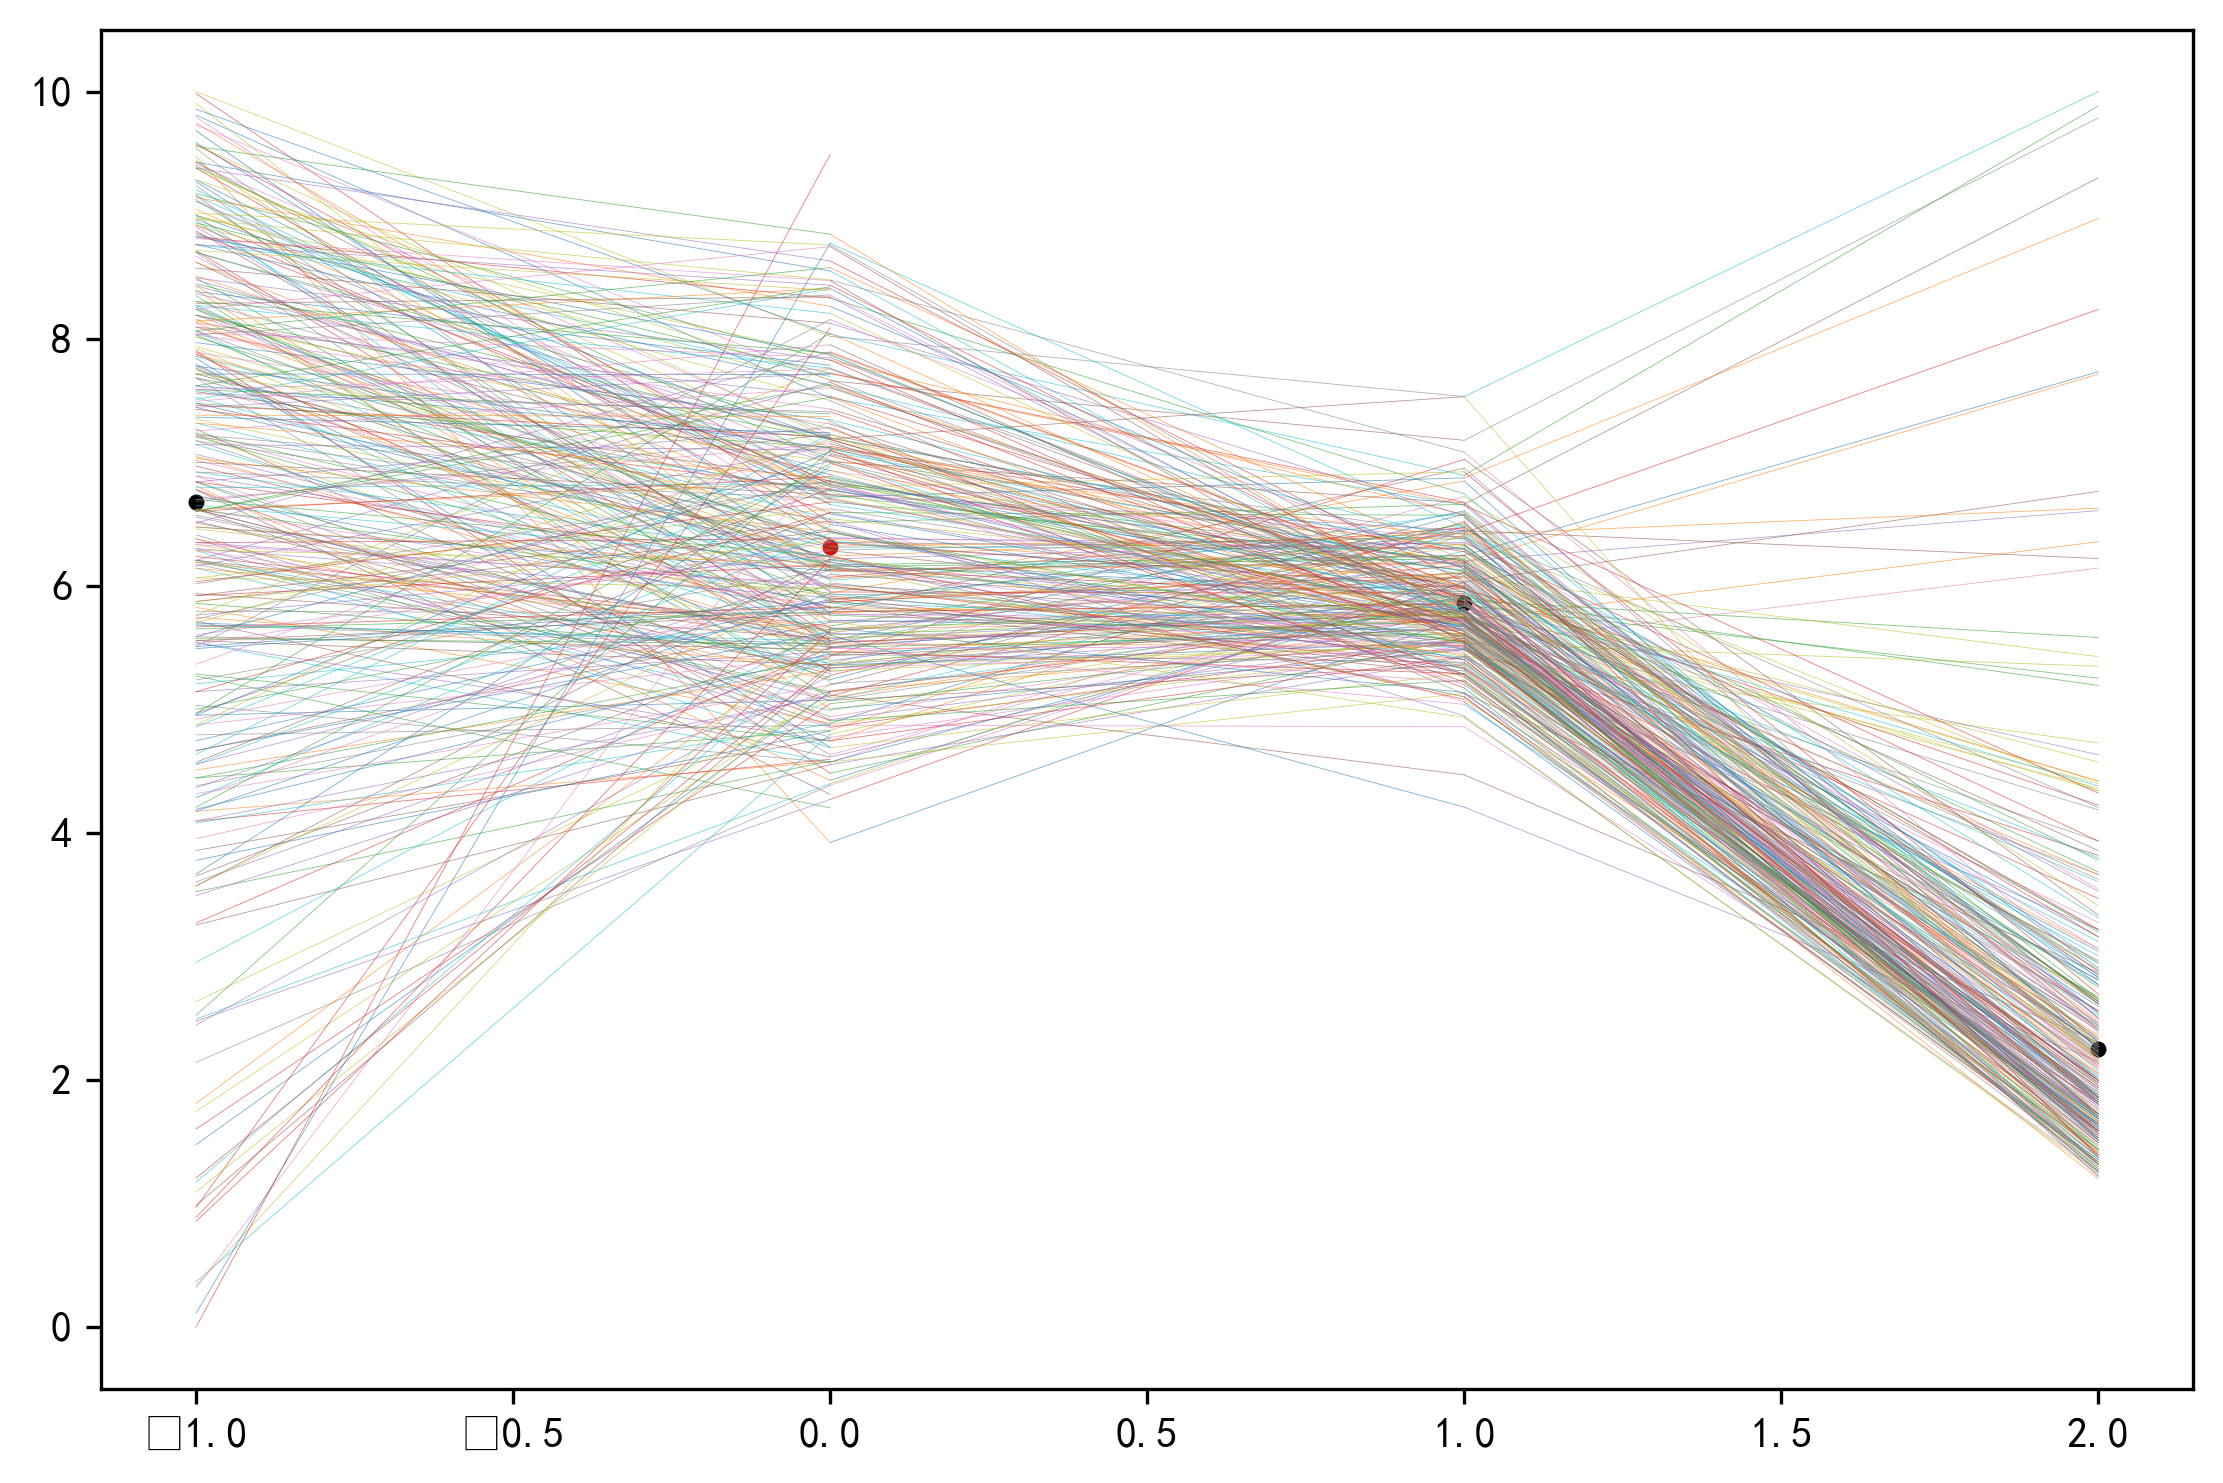

In [165]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

fig,ax = plt.subplots(figsize=(9,6),dpi=300,facecolor='white',edgecolor='black')
ax.set_facecolor('white')
# plt.yticks([])
nt=pd.DataFrame(txdegree)
tt=pd.DataFrame(degree)
for i in tx_order:
    #s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, 
# vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs
    for j in d_order:
        if i[0] ==j[0]: 
            plt.plot([0,1],[i[1]*10,j[1]*10],linewidth=0.2,alpha=0.6)
    try:
        plt.plot([0,-1],[i[1]*10,nt[nt['city']==i[0]]['nor'].values[0]*10],linewidth=0.2,alpha=0.6)
    except:
        pass

for j in d_order:
    try:
        plt.plot([1,2],[j[1]*10,tt[tt['city']==j[0]]['nor'].values[0]*10],linewidth=0.2,alpha=0.6)
    except:
        pass
#             plt.scatter(0, i[1]*10,s=1,alpha=0.6)
#             plt.scatter(1, j[1]*10,s=1,alpha=0.6)
# plt.plot([0,1],[0.6313018927125116*10,0.586352460282993*10],linewidth=1, color='black')
plt.scatter(0,0.6313018927125116*10, s=8, facecolors='none',c='#CE130E')
plt.scatter(1,0.586352460282993*10, s=8, facecolors='none',c='#010000')
plt.scatter(2,tt['nor'].mean()*10, s=8, facecolors='none',c='#010000')
plt.scatter(-1,nt['nor'].mean()*10, s=8, facecolors='none',c='#010000')

plt.savefig('ces.svg',format='svg')
#     plt.axvline(i[1],linewidth=1)
# for i in d_order:
#     plt.axvline(i[1],linewidth=1,color='red',linestyle='-')

In [91]:
type(d_order)

list

In [9]:
model.wv.most_similar('鄂州市')

[('黄石市', 0.9828389883041382),
 ('武汉市', 0.9375606775283813),
 ('黄冈市', 0.9221929311752319),
 ('孝感市', 0.8902579545974731),
 ('荆门市', 0.8448282480239868),
 ('荆州市', 0.8355534076690674),
 ('神农架林区', 0.81700599193573),
 ('宜昌市', 0.8158292770385742),
 ('咸宁市', 0.8100185394287109),
 ('恩施土家族苗族自治州', 0.8097872734069824)]

In [10]:
# from node2vec import Node2Vec
from gensim.models import Word2Vec
# model = Word2Vec.load("TxCity.model")
txmodel = Word2Vec.load("TxCity.model")

In [11]:
txmodel.wv.most_similar('鄂州市')

[('黄石市', 0.9330332279205322),
 ('黄冈市', 0.91644686460495),
 ('荆州市', 0.891531229019165),
 ('武汉市', 0.8851457834243774),
 ('荆门市', 0.8649862408638),
 ('随州市', 0.8648028373718262),
 ('襄阳市', 0.8012635707855225),
 ('孝感市', 0.7903807163238525),
 ('咸宁市', 0.7342451810836792),
 ('潜江市', 0.6754928231239319)]

In [12]:
print(model.wv.most_similar('黄石市'))
print(txmodel.wv.most_similar('黄石市'))

[('鄂州市', 0.9828388690948486), ('黄冈市', 0.9337551593780518), ('武汉市', 0.9016180038452148), ('孝感市', 0.8753196597099304), ('荆州市', 0.8149415254592896), ('海南藏族自治州', 0.810991644859314), ('荆门市', 0.8086920380592346), ('宜昌市', 0.7961364984512329), ('仙桃市', 0.7924633026123047), ('恩施土家族苗族自治州', 0.7919022440910339)]
[('黄冈市', 0.93372642993927), ('鄂州市', 0.9330332279205322), ('荆门市', 0.915556788444519), ('荆州市', 0.8938614130020142), ('武汉市', 0.8826261758804321), ('随州市', 0.875975489616394), ('襄阳市', 0.840164303779602), ('孝感市', 0.763890266418457), ('咸宁市', 0.748317539691925), ('恩施土家族苗族自治州', 0.7198265790939331)]


In [13]:
print(model.wv.most_similar('武汉市'))
print(txmodel.wv.most_similar('武汉市'))

[('鄂州市', 0.9375606775283813), ('孝感市', 0.9294524192810059), ('黄石市', 0.9016180634498596), ('荆州市', 0.8782175183296204), ('荆门市', 0.8660551905632019), ('随州市', 0.8647699356079102), ('咸宁市', 0.8616710901260376), ('天门市', 0.8546229004859924), ('恩施土家族苗族自治州', 0.8348955512046814), ('潜江市', 0.826894223690033)]
[('荆州市', 0.9382882118225098), ('襄阳市', 0.9222549200057983), ('荆门市', 0.9165910482406616), ('黄冈市', 0.9110035300254822), ('孝感市', 0.8884118795394897), ('随州市', 0.8858135938644409), ('鄂州市', 0.8851457834243774), ('黄石市', 0.8826261758804321), ('宜昌市', 0.8470709323883057), ('十堰市', 0.8278923034667969)]


In [14]:
print(model.wv.most_similar('北京市'))
print(txmodel.wv.most_similar('北京市'))

[('天津市', 0.8094928860664368), ('廊坊市', 0.7915091514587402), ('西宁市', 0.780098021030426), ('和田地区', 0.7571321725845337), ('陇南市', 0.7558947801589966), ('石河子市', 0.7522575855255127), ('保定市', 0.7477155923843384), ('图木舒克市', 0.7470559477806091), ('金昌市', 0.7441579103469849), ('唐山市', 0.735717236995697)]
[('廊坊市', 0.9602090120315552), ('唐山市', 0.9238393306732178), ('天津市', 0.8951119184494019), ('石家庄市', 0.8616484999656677), ('丹东市', 0.8366309404373169), ('沧州市', 0.8363302946090698), ('张家口市', 0.8337637782096863), ('营口市', 0.833287239074707), ('鞍山市', 0.8218435049057007), ('大连市', 0.8137998580932617)]


In [15]:
print(model.wv.most_similar('上海市'))
print(txmodel.wv.most_similar('上海市'))

[('石河子市', 0.8371904492378235), ('伊犁哈萨克自治州', 0.835497260093689), ('香港特别行政区', 0.83176189661026), ('墨玉县', 0.8047571182250977), ('乌鲁木齐市', 0.7886195778846741), ('庆阳市', 0.7808444499969482), ('图木舒克市', 0.7747491598129272), ('阿勒泰地区', 0.7712934613227844), ('博尔塔拉蒙古自治州', 0.7711021304130554), ('昌吉回族自治州', 0.7666997909545898)]
[('南京市', 0.931973934173584), ('连云港市', 0.9109500050544739), ('宁波市', 0.9024472236633301), ('南通市', 0.9002569913864136), ('扬州市', 0.8893300890922546), ('丽水市', 0.8888530731201172), ('宣城市', 0.8837019205093384), ('滁州市', 0.8780673742294312), ('嘉兴市', 0.8738280534744263), ('苏州市', 0.8717979192733765)]


In [16]:
print(model.wv.most_similar('苏州市'))
print(txmodel.wv.most_similar('苏州市'))

[('无锡市', 0.9262347221374512), ('常州市', 0.9074972867965698), ('南通市', 0.9008468389511108), ('泰州市', 0.8677151203155518), ('盐城市', 0.860168993473053), ('滁州市', 0.8531033992767334), ('镇江市', 0.84959876537323), ('南京市', 0.8402857184410095), ('徐州市', 0.8149058818817139), ('蚌埠市', 0.8122343420982361)]
[('常州市', 0.9794974327087402), ('南通市', 0.9567327499389648), ('南京市', 0.943356454372406), ('镇江市', 0.9424853324890137), ('扬州市', 0.9333765506744385), ('宿迁市', 0.933006227016449), ('泰州市', 0.9314473867416382), ('盐城市', 0.9037569165229797), ('连云港市', 0.8902602195739746), ('宿州市', 0.8883416652679443)]


In [17]:
from scipy.stats import pearsonr
pccs = pearsonr(model.wv.get_vector('武汉市'), txmodel.wv.get_vector('武汉市'))

In [18]:
pccs = np.corrcoef(model.wv.get_vector('武汉市'), txmodel.wv.get_vector('武汉市'))
print(pccs)

[[ 1.        -0.0584509]
 [-0.0584509  1.       ]]


In [19]:
cname=['武汉市','孝感市','黄石市','黄冈市','鄂州市','咸宁市','南昌市','九江市','景德镇市','上饶市','抚州市','鹰潭市','长沙市','株洲市','湘潭市','岳阳市','衡阳市','益阳市','常德市','娄底市']
ename=['Wuhan','Xiaogan','Huangshi','Huanggang','Ezhou','Xianning','Tianmen','Xiantao','Qianjiang','Nanchang','Jiujiang','Jingdczhen','Shangrao','Fuzhou','Yingtan','Changsha','Zhuzhou','Xiangtan','Yueyang','Hcngyang','Yiyang','Changde','Loudi']

## 能否计算质心

In [36]:
model.wv.most_similar('上海市')[0][0]

'石河子市'

In [37]:
pearson_list=[]
for i in range(len(cname)):
    tmp=[]
    for j in model.wv.most_similar(cname[i]):
        tmp.append(j[0])
    pearson_list.append(tmp)

In [ ]:
plt.plot(newX[:,0],newX[:,1],'ro')
plt.plot(newX2[:,0],newX2[:,1],'go')

for i in range(len(newX)):
    plt.plot([newX[i][0],newX2[i][0]],[newX[i][1],newX2[i][1]],'b')
    plt.arrow(newX[i][0],newX[i][1],newX2[i][0]-newX[i][0],newX2[i][1]-newX[i][1], width=0.02,head_starts_at_zero=True)

plt.show()

In [42]:
sum_trans=np.zeros(20)
sum_POI=np.zeros(20)
for i in range(len(cname)):
    sum_trans=sum_trans+model.wv.get_vector(cname[i])
    sum_POI=sum_POI+txmodel.wv.get_vector(cname[i])

In [52]:
data_trans={}
data_POI={}
for i in range(len(cname)):
    data_trans[cname[i]]=np.corrcoef(model.wv.get_vector(cname[i]),sum_trans/20)[0][1]
    data_POI[cname[i]]=np.corrcoef(txmodel.wv.get_vector(cname[i]),sum_POI/20)[0][1]

In [54]:
d_order=sorted(data_trans.items(),key=lambda x:x[1],reverse=False)  # 按字典集合中，每一个元组的第二
d_order

[('鹰潭市', 0.6058047185431673),
 ('上饶市', 0.6221595274840949),
 ('抚州市', 0.6446946427724167),
 ('常德市', 0.686976355061649),
 ('娄底市', 0.6871937763098377),
 ('景德镇市', 0.6963180654326003),
 ('衡阳市', 0.7006829943395151),
 ('湘潭市', 0.7073917826964287),
 ('黄石市', 0.7130252237210647),
 ('鄂州市', 0.7208494392025526),
 ('益阳市', 0.7332525923741755),
 ('南昌市', 0.7354189452320521),
 ('九江市', 0.7458484651640488),
 ('株洲市', 0.7506421221347773),
 ('长沙市', 0.75713044198753),
 ('黄冈市', 0.7575269699746515),
 ('孝感市', 0.7629090244010014),
 ('武汉市', 0.7833864066309109),
 ('岳阳市', 0.7920710074261289),
 ('咸宁市', 0.8033656949866714)]

In [55]:
d_order=sorted(data_POI.items(),key=lambda x:x[1],reverse=False)  # 按字典集合中，每一个元组的第二
d_order

[('孝感市', 0.6238259301887796),
 ('景德镇市', 0.7327471496092488),
 ('鄂州市', 0.7443611190264967),
 ('咸宁市', 0.7527162626730002),
 ('上饶市', 0.7618098276709453),
 ('鹰潭市', 0.7656584702125929),
 ('南昌市', 0.8007541149999172),
 ('武汉市', 0.8047790347919026),
 ('黄石市', 0.8133942496104412),
 ('抚州市', 0.8237620803744702),
 ('九江市', 0.829740789997213),
 ('衡阳市', 0.8329419665792718),
 ('湘潭市', 0.8378294640862763),
 ('娄底市', 0.8502834286673615),
 ('长沙市', 0.8666207443386607),
 ('岳阳市', 0.8717595553198783),
 ('益阳市', 0.8794409475613467),
 ('黄冈市', 0.8795053562740067),
 ('株洲市', 0.8796975606432972),
 ('常德市', 0.8934713018645976)]

In [38]:
pearson_list

[['鄂州市', '孝感市', '黄石市', '荆州市', '荆门市', '随州市', '咸宁市', '天门市', '恩施土家族苗族自治州', '潜江市'],
 ['荆门市', '武汉市', '随州市', '荆州市', '襄阳市', '潜江市', '鄂州市', '天门市', '仙桃市', '咸宁市'],
 ['鄂州市',
  '黄冈市',
  '武汉市',
  '孝感市',
  '荆州市',
  '海南藏族自治州',
  '荆门市',
  '宜昌市',
  '仙桃市',
  '恩施土家族苗族自治州'],
 ['黄石市',
  '鄂州市',
  '孝感市',
  '九江市',
  '武汉市',
  '荆州市',
  '宜昌市',
  '咸宁市',
  '恩施土家族苗族自治州',
  '海南藏族自治州'],
 ['黄石市',
  '武汉市',
  '黄冈市',
  '孝感市',
  '荆门市',
  '荆州市',
  '神农架林区',
  '宜昌市',
  '咸宁市',
  '恩施土家族苗族自治州'],
 ['荆州市', '孝感市', '岳阳市', '随州市', '武汉市', '天门市', '海南藏族自治州', '荆门市', '襄阳市', '仙桃市'],
 ['抚州市', '九江市', '宜春市', '景德镇市', '吉安市', '新余市', '赣州市', '鹰潭市', '上饶市', '萍乡市'],
 ['南昌市', '赣州市', '吉安市', '抚州市', '景德镇市', '宜春市', '黄冈市', '新余市', '鹰潭市', '上饶市'],
 ['抚州市', '上饶市', '鹰潭市', '南昌市', '新余市', '宜春市', '九江市', '吉安市', '萍乡市', '赣州市'],
 ['鹰潭市', '景德镇市', '新余市', '抚州市', '宜春市', '萍乡市', '金华市', '衢州市', '南昌市', '安顺市'],
 ['南昌市', '景德镇市', '新余市', '宜春市', '上饶市', '鹰潭市', '九江市', '吉安市', '赣州市', '萍乡市'],
 ['上饶市', '景德镇市', '新余市', '抚州市', '宜春市', '萍乡市', '金华市', '衢州市', '南昌市', '温州市'],
 ['益阳市',
  '株洲市',
  '常德

In [20]:
datas={}
for i in range(len(cname)):
    datas[ename[i]]=model.wv.get_vector(cname[i])

In [21]:
pd.DataFrame(datas)

,Wuhan,Xiaogan,Huangshi,Huanggang,Ezhou,Xianning,Tianmen,Xiantao,Qianjiang,Nanchang,Jiujiang,Jingdczhen,Shangrao,Fuzhou,Yingtan,Changsha,Zhuzhou,Xiangtan,Yueyang,Hcngyang
0,-0.275075,-0.217252,-0.301111,-0.088236,-0.370136,-0.217264,0.482124,0.252675,0.404771,0.152029,0.397414,0.380297,-0.125231,0.203979,-0.143147,-0.100875,0.318105,-0.115186,-0.072848,-0.117880
1,0.183425,0.165308,0.069942,-0.174408,0.065563,0.078745,0.115158,-0.148120,0.328232,0.334278,0.246849,0.386231,0.592007,0.558067,0.688266,0.336178,0.438880,0.443625,0.394573,0.642415
2,0.601406,0.730293,0.900291,0.743820,0.695738,0.385491,0.462893,0.604723,0.275539,0.151078,0.430510,0.175186,0.069289,0.090876,0.089395,0.220840,0.138268,-0.010108,-0.020883,0.131730
3,-0.161562,-0.128580,-0.310831,-0.318369,-0.331990,-0.274837,-0.012803,-0.073779,0.193554,0.650418,0.209065,0.586563,0.060326,0.019022,0.377431,-0.162762,-0.105207,0.051875,0.162459,0.400213
4,-0.486843,-0.275868,-0.560117,-0.326300,-0.583122,-0.455836,-0.636050,-0.562608,-0.416989,-0.395596,-0.514674,-0.458172,-0.409283,-0.473412,-0.656383,-0.264816,-0.345742,-0.451283,0.004629,-0.569810
5,0.727225,0.523025,0.878108,0.622985,0.883090,0.493725,0.340902,0.472628,0.313093,0.054735,0.020313,0.076065,0.487486,0.149766,0.087067,0.363725,0.292121,0.377919,0.448468,-0.014260
6,-0.515476,-0.833495,-0.870502,-0.800981,-0.781413,-0.702656,-0.334772,-0.324634,-0.477675,-0.504375,-0.475498,-0.266114,-0.139067,-0.277010,-0.349561,-0.555688,-0.370138,-0.343138,-0.440774,-0.464220
7,-0.132118,-0.121255,0.129894,0.295340,0.120523,-0.302224,0.519032,0.549911,0.307487,0.250110,0.466078,0.348052,-0.372929,-0.478387,-0.568235,-0.507110,-0.410847,-0.516622,-0.358089,-0.626917
8,-0.565136,-0.365553,-0.487315,-0.389093,-0.488764,-0.409710,-0.212296,-0.339397,-0.329298,-0.354399,-0.070225,-0.525160,-0.344413,-0.500087,-0.513532,-0.408335,-0.493397,-0.282581,-0.130443,-0.504302
9,0.162515,0.117046,-0.005446,-0.031183,-0.042323,0.336381,-0.206892,-0.187571,-0.458630,-0.441536,-0.341490,-0.529697,0.316464,0.075595,-0.045304,0.335300,0.226920,0.225003,0.308439,-0.020819


In [22]:
pd.DataFrame(datas).to_csv('Matrix.csv',index=None)

In [23]:
txdatas={}
for i in range(len(cname)):
    txdatas[ename[i]]=txmodel.wv.get_vector(cname[i])
pd.DataFrame(txdatas)

,Wuhan,Xiaogan,Huangshi,Huanggang,Ezhou,Xianning,Tianmen,Xiantao,Qianjiang,Nanchang,Jiujiang,Jingdczhen,Shangrao,Fuzhou,Yingtan,Changsha,Zhuzhou,Xiangtan,Yueyang,Hcngyang
0,-0.503913,-0.144787,-0.607311,-0.514606,-0.592668,-0.396515,-0.671278,-0.460247,-0.634943,-0.721566,-0.497765,-0.518519,-0.127152,-0.288083,-0.052762,-0.176125,-0.232443,-0.157174,-0.237712,-0.216847
1,-0.254659,-0.288110,-0.193126,-0.126186,-0.315783,-0.146521,-0.313100,-0.224855,-0.350577,-0.441236,-0.268644,-0.122346,-0.442621,-0.380374,-0.389269,-0.261620,-0.428479,-0.484044,-0.137404,-0.397264
2,0.513492,0.779153,0.463102,0.333868,0.427155,0.547131,0.126116,0.183081,0.086167,-0.111214,-0.013629,0.159491,0.445312,0.431778,0.378155,0.234347,0.310475,0.253164,0.260474,0.376186
3,0.052394,0.221612,-0.049616,0.048008,-0.039795,0.258067,-0.284237,-0.263611,-0.327076,-0.313833,-0.251418,0.000956,-0.052172,0.035706,-0.114703,-0.131213,-0.211434,-0.026252,-0.295897,-0.062948
4,0.224561,0.157429,0.521395,0.344922,0.492956,0.362377,0.186800,0.153560,-0.061644,0.072639,0.281953,0.005099,0.421698,0.809177,0.762297,0.586791,0.500136,0.522449,0.231624,0.588169
5,0.586534,0.598667,0.469722,0.493119,0.816690,0.633849,0.150252,0.193008,0.180020,0.149173,0.360023,0.054331,0.387754,0.497739,0.556655,0.298424,0.336586,0.288150,0.493324,0.367654
6,0.518966,0.713096,0.569551,0.470055,0.608119,0.185819,-0.046620,0.036061,-0.055943,-0.041775,-0.078959,-0.030007,0.007786,0.161857,-0.126606,0.162332,-0.101401,-0.058463,0.071656,0.026721
7,-0.084071,0.028272,-0.269676,-0.268159,-0.386475,-0.244659,-0.352751,-0.407231,-0.471662,-0.213011,-0.477238,-0.232719,-0.441605,-0.441797,-0.553515,-0.335776,-0.678238,-0.517404,-0.441014,-0.406974
8,-0.115733,0.071625,-0.471521,-0.250244,-0.267707,-0.573241,-0.053218,0.028279,0.134177,-0.108636,0.022447,0.024695,-0.122934,-0.084172,-0.112214,-0.354491,-0.047745,-0.117096,-0.031577,-0.451552
9,0.091145,0.302319,0.139882,-0.128523,-0.086240,-0.418820,0.133700,0.102701,0.118041,0.096630,0.061516,-0.062091,-0.155741,-0.230323,-0.099695,-0.230734,-0.316968,-0.122933,0.007356,-0.033019


In [24]:
print(model.wv.most_similar('上海市'))
print(txmodel.wv.most_similar('上海市'))

[('石河子市', 0.8371904492378235), ('伊犁哈萨克自治州', 0.835497260093689), ('香港特别行政区', 0.83176189661026), ('墨玉县', 0.8047571182250977), ('乌鲁木齐市', 0.7886195778846741), ('庆阳市', 0.7808444499969482), ('图木舒克市', 0.7747491598129272), ('阿勒泰地区', 0.7712934613227844), ('博尔塔拉蒙古自治州', 0.7711021304130554), ('昌吉回族自治州', 0.7666997909545898)]
[('南京市', 0.931973934173584), ('连云港市', 0.9109500050544739), ('宁波市', 0.9024472236633301), ('南通市', 0.9002569913864136), ('扬州市', 0.8893300890922546), ('丽水市', 0.8888530731201172), ('宣城市', 0.8837019205093384), ('滁州市', 0.8780673742294312), ('嘉兴市', 0.8738280534744263), ('苏州市', 0.8717979192733765)]


In [25]:
print(model.wv.get_vector('上海市'))
print(txmodel.wv.get_vector('上海市'))

[-0.03449742  0.4532164  -0.08397751  0.20043187  0.0101276   0.14595008
 -0.11653395  0.2813874  -0.5003739   0.26392087  0.22367817 -0.17903177
 -0.03732806 -0.08736987  0.5761996  -0.3130775  -0.27808067 -0.02946725
  0.51899767 -0.13221328]
[-0.31109586 -0.0768211   0.0493513  -0.06551986 -0.1684805  -0.18331917
  0.26960224 -0.27248776 -0.21214469  0.16671152  0.18321338  0.29656917
  0.3337028  -0.3761216   0.07183805 -0.5471185   0.32142234 -0.0647155
 -0.04651397 -0.19209917]


In [26]:
a=model.wv.get_vector('上海市')*txmodel.wv.get_vector('上海市')

In [27]:
b=model.wv.get_vector('北京市')*txmodel.wv.get_vector('北京市')

In [28]:
np.array([a,b])

array([[ 0.01073201, -0.03481658, -0.0041444 , -0.01313227, -0.0017063 ,
        -0.02675545, -0.03141781, -0.07667462,  0.10615166,  0.04399865,
         0.04098083, -0.0530953 , -0.01245648,  0.0328617 ,  0.04139306,
         0.17129049, -0.08938134,  0.00190699, -0.02414064,  0.02539806],
       [-0.01307746, -0.08825226, -0.01011234, -0.00141189,  0.06464746,
        -0.10456059, -0.02378691, -0.05908717, -0.06014424, -0.09248928,
        -0.00386723, -0.0338155 , -0.0105656 ,  0.0726725 ,  0.03189795,
         0.08437234, -0.1282681 , -0.04650568, -0.02142727, -0.05401468]],
      dtype=float32)

In [29]:
import seaborn as sns
import palettable
import matplotlib.pyplot as plt

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2)   #降到2维
X=pd.DataFrame(txdatas)
pca.fit(X)                  #训练
newX=pca.fit_transform(X)   #降维后的数据

In [32]:
pca = PCA(n_components=2)   #降到2维
X=pd.DataFrame(datas)
pca.fit(X)                  #训练
newX2=pca.fit_transform(X)   #降维后的数据

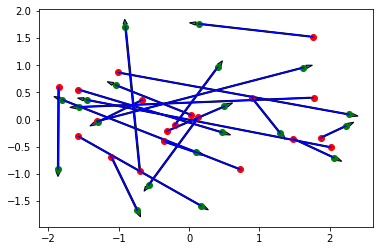

In [33]:
plt.plot(newX[:,0],newX[:,1],'ro')
plt.plot(newX2[:,0],newX2[:,1],'go')

for i in range(len(newX)):
    plt.plot([newX[i][0],newX2[i][0]],[newX[i][1],newX2[i][1]],'b')
    plt.arrow(newX[i][0],newX[i][1],newX2[i][0]-newX[i][0],newX2[i][1]-newX[i][1], width=0.02,head_starts_at_zero=True)

plt.show()

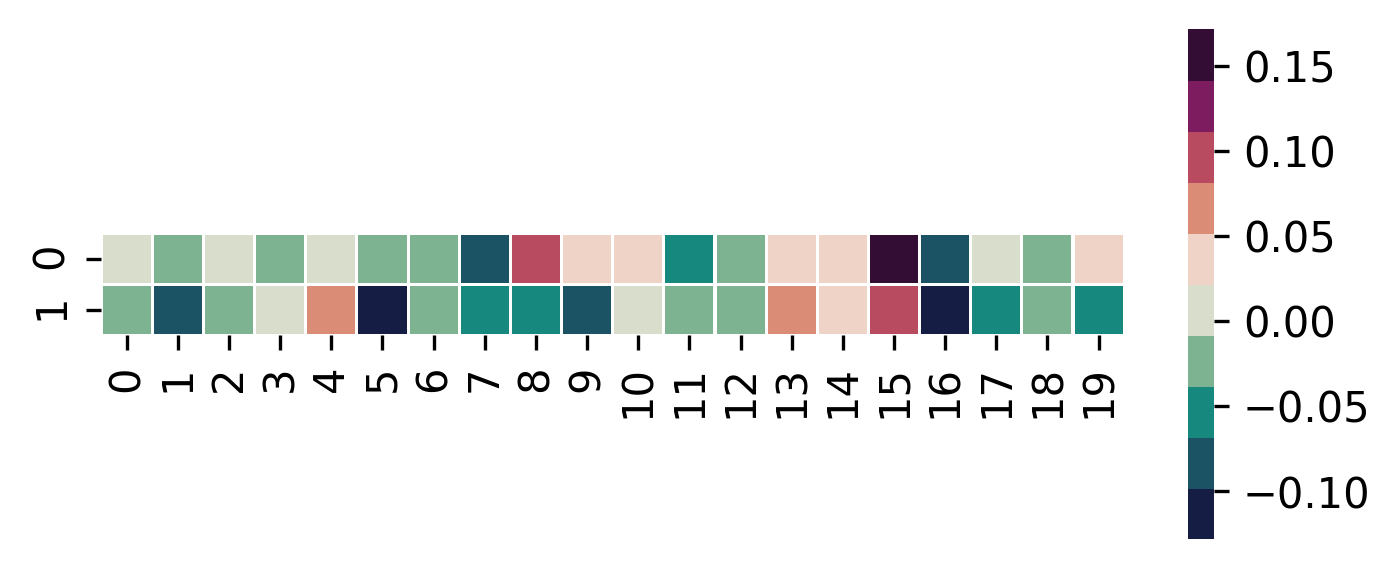

In [34]:
plt.figure(figsize=(5.5, 4.5),dpi=300)
sns.heatmap(data=np.array([a,b]),
#             vmax=0.3,
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
#             annot=True,
            fmt=".2f",
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
#             mask=np.triu(np.ones_like(np.array([a,b]),dtype=np.bool)),
            square=True, linewidths=.5,
            cbar_kws={"shrink": .5}
           )
plt.show()